# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [156]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
%pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\anirb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [157]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [158]:
import os
import numpy as np  # Importing numpy for Matrix Operations
import pandas as pd  # Importing pandas to read CSV files
import matplotlib.pyplot as plt  # Importting matplotlib for Plotting and visualizing images
import math  # Importing math module to perform mathematical operations
import cv2  # Importing openCV for image processing
import seaborn as sns  # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
)  # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import (
    Sequential,
)  # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)  # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import (
    Adam,
    SGD,
)  # Importing the optimizers which can be used in our model
from sklearn import (
    preprocessing,
)  # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import (
    train_test_split,
)  # Importing train_test_split function to split the data into train and test
from sklearn.metrics import (
    confusion_matrix,
)  # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer

# Display images using OpenCV
# from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [159]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [160]:
# Now let's import and put the train and test datasets in  pandas dataframe
folderPath = "./inputs"

# Load the image file of dataset
images = np.load(folderPath + "/images.npy")  # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv(
    folderPath + "/Labels.csv"
)  # Complete the code to read the dataset

In [161]:
print(images.shape)  # Complete the code to check the shape
print(labels.shape)  # Complete the code to check the shape

(4750, 128, 128, 3)
(4750, 1)


## Data Overview

### Understand the shape of the dataset

In [162]:
def plot_images(images, labels):
    num_classes = 10  # Number of Classes
    categories = np.unique(labels)
    keys = dict(labels["Label"])  # Obtaing the unique classes from y_train
    rows = 3  # Defining number of rows=3
    cols = 4  # Defining number of columns=4
    fig = plt.figure(figsize=(10, 8))  # Defining the figure size to 10x8
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(
                0, len(labels)
            )  # Generating random indices from the data and plotting the images
            ax = fig.add_subplot(
                rows, cols, i * rows + j + 1
            )  # Adding subplots with 3 rows and 4 columns
            ax.imshow(images[random_index, :])  # Plotting the image
            ax.set_title(keys[random_index])
    plt.show()

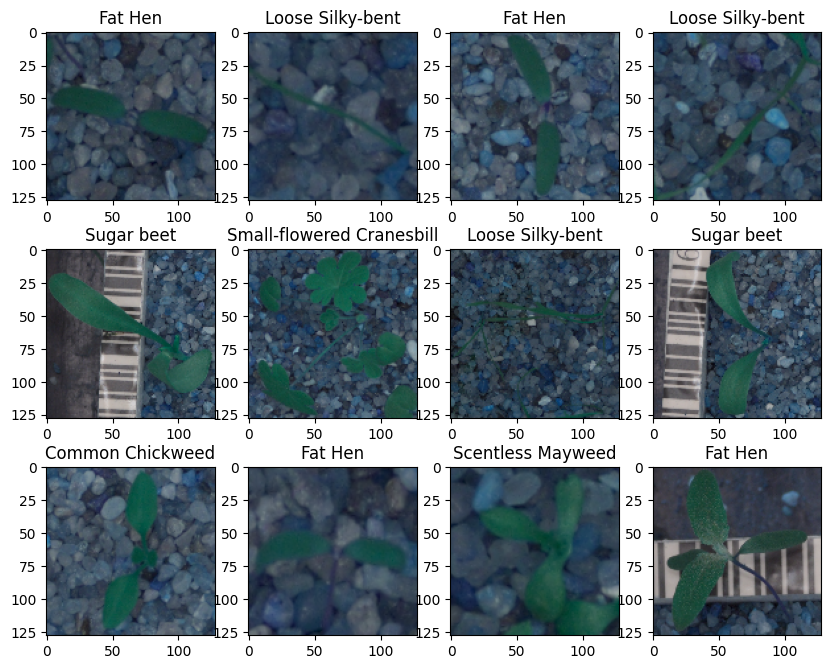

In [163]:
plot_images(
    images, labels
)  # Complete the code to input the images and labels to the function and plot the images with their labels

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

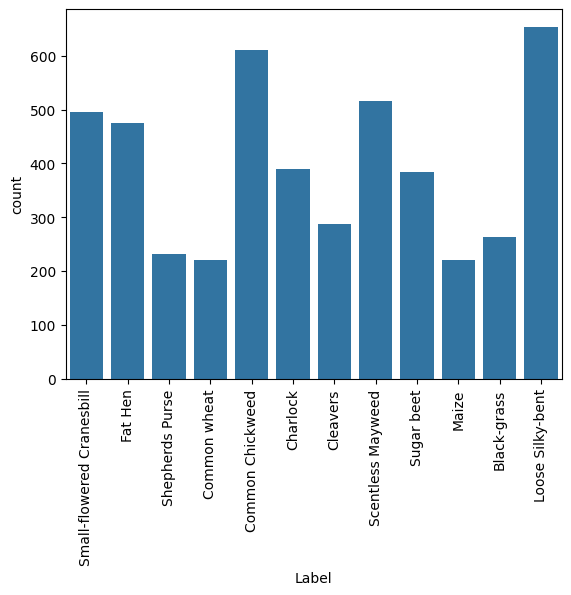

In [164]:
sns.countplot(x=labels["Label"])  # Complete the code to check for data imbalance
plt.xticks(rotation="vertical")

The data is pretty well balanced

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [165]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(
        images[i], cv2.COLOR_BGR2RGB
    )  # Complete the code to convert the images from BGR to RGB

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [166]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
    images_decreased.append(
        cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR)
    )

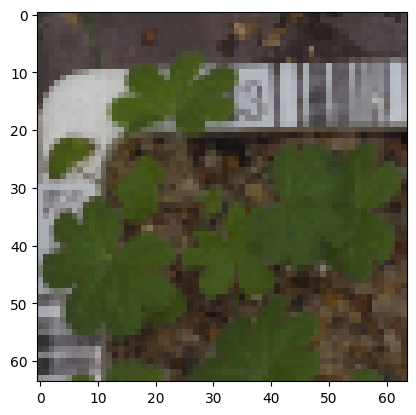

In [167]:
plt.imshow(images_decreased[3])

In [168]:
# Applying Gaussian Blur to denoise the images
images_gb = []
for i in range(len(images)):
    # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    images_gb.append(cv2.GaussianBlur(images[i], ksize=(3, 3), sigmaX=0))

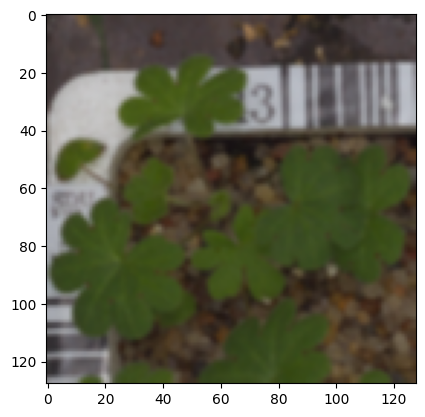

In [169]:
plt.imshow(images_gb[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [170]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)

In [171]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [172]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [173]:
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape  # Complete the code to check the shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [174]:
# Normalizing the image pixels
X_train_normalized = X_train.astype("float32") / 255.0
X_val_normalized = X_val.astype("float32") / 255.0
X_test_normalized = X_test.astype("float32") / 255.0

In [175]:
X_train_normalized.shape, X_val_normalized.shape, X_test_normalized.shape  # Complete the code to check the shape of train, validation and test data

((3847, 64, 64, 3), (428, 64, 64, 3), (475, 64, 64, 3))

## Model Building

In [176]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [177]:
# Fixing the seed for random number generators
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [178]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(rotation_range=20, fill_mode="nearest")

In [179]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(
    Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3))
)

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding="same"))

model1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model1.add(MaxPooling2D((2, 2), padding="same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(16, activation="relu"))
model1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation="softmax"))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam()
# Compile model
model1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [180]:
history_1 = model1.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2,
)

Epoch 1/30
121/121 - 3s - loss: 2.4558 - accuracy: 0.1271 - val_loss: 2.4014 - val_accuracy: 0.1589 - 3s/epoch - 22ms/step
Epoch 2/30
121/121 - 2s - loss: 2.3372 - accuracy: 0.1778 - val_loss: 2.2157 - val_accuracy: 0.2336 - 2s/epoch - 16ms/step
Epoch 3/30
121/121 - 2s - loss: 2.1231 - accuracy: 0.2436 - val_loss: 1.9383 - val_accuracy: 0.3411 - 2s/epoch - 16ms/step
Epoch 4/30
121/121 - 2s - loss: 1.9755 - accuracy: 0.2891 - val_loss: 1.7810 - val_accuracy: 0.3575 - 2s/epoch - 16ms/step
Epoch 5/30
121/121 - 2s - loss: 1.8950 - accuracy: 0.2974 - val_loss: 1.6980 - val_accuracy: 0.3598 - 2s/epoch - 16ms/step
Epoch 6/30
121/121 - 2s - loss: 1.8346 - accuracy: 0.3267 - val_loss: 1.6815 - val_accuracy: 0.4182 - 2s/epoch - 15ms/step
Epoch 7/30
121/121 - 2s - loss: 1.7929 - accuracy: 0.3522 - val_loss: 1.6013 - val_accuracy: 0.4346 - 2s/epoch - 15ms/step
Epoch 8/30
121/121 - 2s - loss: 1.7498 - accuracy: 0.3728 - val_loss: 1.5423 - val_accuracy: 0.4743 - 2s/epoch - 15ms/step
Epoch 9/30
121/1

### Model Evaluation

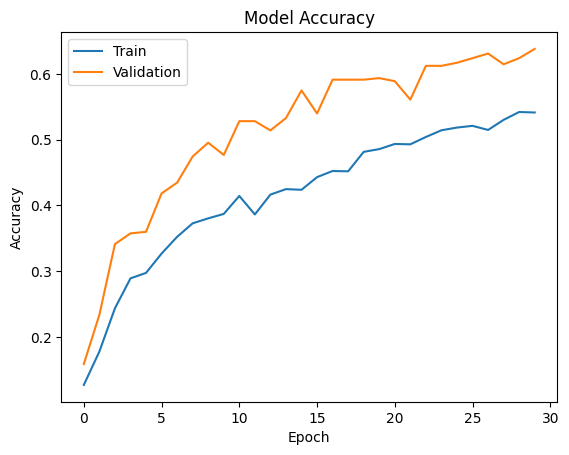

In [181]:
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

### Evaluating model on test data

In [182]:
model1_test_accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.2915 - accuracy: 0.5937 - 89ms/epoch - 6ms/step


In [183]:
model1_train_accuracy = model1.evaluate(X_train_normalized, y_train_encoded, verbose=2)

121/121 - 1s - loss: 0.8294 - accuracy: 0.7164 - 554ms/epoch - 5ms/step


In [184]:
model1_val_accuracy = model1.evaluate(X_val_normalized, y_val_encoded, verbose=2)

14/14 - 0s - loss: 1.1798 - accuracy: 0.6379 - 79ms/epoch - 6ms/step


In [185]:
# Here we would get the output as probablities for each category
y_pred = model1.predict(X_test_normalized)

15/15 [==============================] - 0s 5ms/step


### Plotting Confusion Matrix


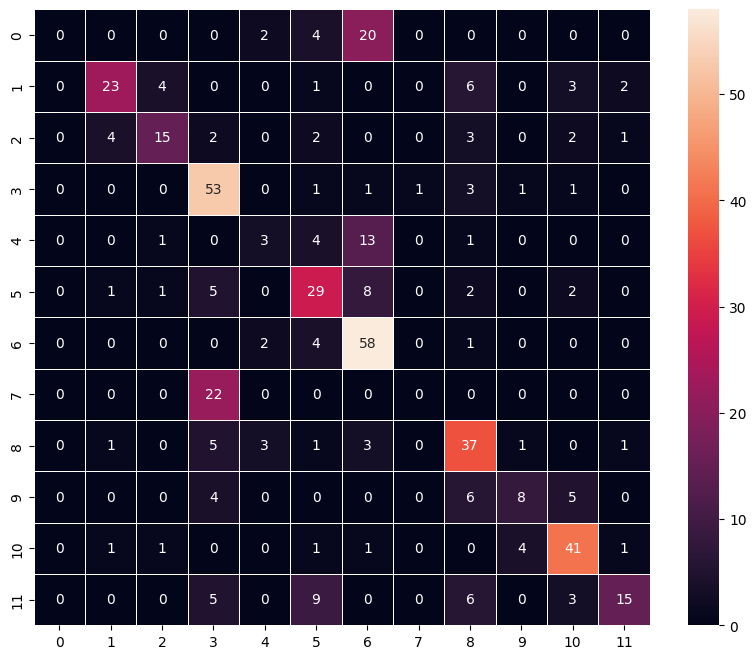

In [186]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.4, fmt="d", square=True, ax=ax)
plt.show()

#### Observations
- We observe that some of the classes are not predicted correctly.
- In comparison to the rest, we can see that classes 0,4, 7 and 9 are well classified.
- We can also observe that classes 3,6,5 and 10 are mostly misclassified.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor

In [187]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [188]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [189]:
# All images to be rescaled by 1/255. Using only 1 augumentation, which is rotation range - 20
train_datagen = ImageDataGenerator(rotation_range=20, fill_mode="nearest")

In [190]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_2.add(
    Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3))
)

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding="same"))
# model.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_2.add(MaxPooling2D((2, 2), padding="same"))
model_2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(16, activation="relu"))
model_2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation="softmax"))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam()
# Compile model
model_2.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [191]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_2 = model_2.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train_encoded,
        batch_size=batch_size,
        seed=42,
        shuffle=False,
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,callbacks=[learning_rate_reduction]
)

Epoch 1/25
60/60 [==============================] - 3s 44ms/step - loss: 2.1451 - accuracy: 0.2398 - val_loss: 2.3811 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 2/25
60/60 [==============================] - 3s 42ms/step - loss: 1.7312 - accuracy: 0.3881 - val_loss: 2.2797 - val_accuracy: 0.2079 - lr: 0.0010
Epoch 3/25
60/60 [==============================] - 3s 42ms/step - loss: 1.5452 - accuracy: 0.4510 - val_loss: 2.2465 - val_accuracy: 0.2850 - lr: 0.0010
Epoch 4/25
60/60 [==============================] - 3s 43ms/step - loss: 1.4509 - accuracy: 0.4978 - val_loss: 2.0527 - val_accuracy: 0.3084 - lr: 0.0010
Epoch 5/25
60/60 [==============================] - 3s 42ms/step - loss: 1.3655 - accuracy: 0.5094 - val_loss: 1.8271 - val_accuracy: 0.5164 - lr: 0.0010
Epoch 6/25
60/60 [==============================] - 3s 42ms/step - loss: 1.2514 - accuracy: 0.5572 - val_loss: 1.8206 - val_accuracy: 0.3808 - lr: 0.0010
Epoch 7/25
60/60 [==============================] - 3s 42ms/step - loss: 1.2

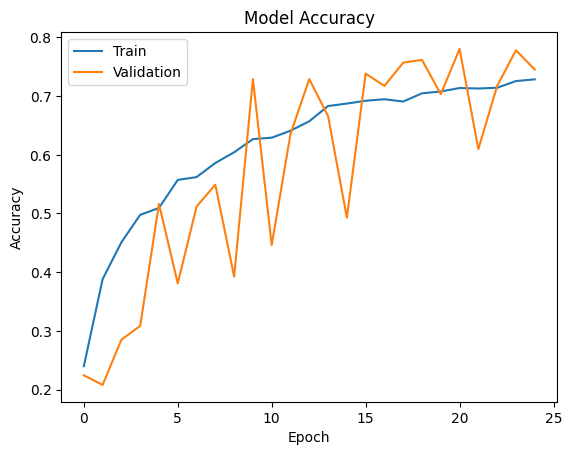

In [192]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

Obervations:

Increasing Training Accuracy: As the number of epochs increases, the training accuracy generally improves. This is expected as the model learns more from the training data.

Overfitting Potential: While the training accuracy continues to rise, the validation accuracy fluctuates and may eventually plateau or even start to decline. This indicates a potential for overfitting, where the model becomes too specialized to the training data and struggles to generalize to new, unseen data.

In [193]:
model_2_test_accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8640 - accuracy: 0.7347 - 89ms/epoch - 6ms/step


In [194]:
model_2_train_accuracy = model_2.evaluate(X_train_normalized, y_train_encoded, verbose=2)

121/121 - 1s - loss: 0.5013 - accuracy: 0.8282 - 595ms/epoch - 5ms/step


In [195]:
model_2_val_accuracy = model_2.evaluate(X_val_normalized, y_val_encoded, verbose=2)

14/14 - 0s - loss: 0.8049 - accuracy: 0.7453 - 83ms/epoch - 6ms/step


15/15 [==============================] - 0s 5ms/step


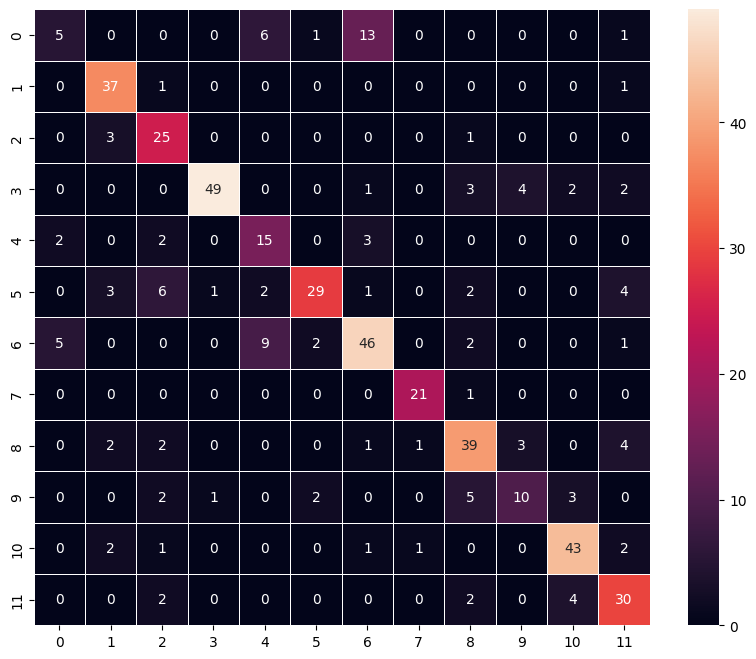

In [196]:
y_pred = model_2.predict(X_test_normalized)
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.4, fmt="d", square=True, ax=ax)
plt.show()

### Transfer Learning using VGG16


In [197]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [198]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [199]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

# Adding a dense output layer
model_3.add(Dense(32, activation="relu"))
model_3.add(Dropout(0.2))
model_3.add(Dense(16, activation="relu"))
model_3.add(Dense(12, activation="softmax"))
opt = Adam()
# Compile model
model_3.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14780988 (56.38 MB)
Trainable params: 66

In [200]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = model_3.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train_encoded,
        batch_size=batch_size,
        seed=42,
        shuffle=False,
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1
)

Epoch 1/25
60/60 [==============================] - 14s 219ms/step - loss: 2.3819 - accuracy: 0.1644 - val_loss: 2.2586 - val_accuracy: 0.2827
Epoch 2/25
60/60 [==============================] - 13s 218ms/step - loss: 2.1709 - accuracy: 0.2712 - val_loss: 2.0446 - val_accuracy: 0.3762
Epoch 3/25
60/60 [==============================] - 13s 222ms/step - loss: 1.9579 - accuracy: 0.3431 - val_loss: 1.8623 - val_accuracy: 0.3668
Epoch 4/25
60/60 [==============================] - 13s 223ms/step - loss: 1.7986 - accuracy: 0.3777 - val_loss: 1.7707 - val_accuracy: 0.3879
Epoch 5/25
60/60 [==============================] - 14s 228ms/step - loss: 1.7047 - accuracy: 0.3984 - val_loss: 1.6618 - val_accuracy: 0.3972
Epoch 6/25
60/60 [==============================] - 14s 225ms/step - loss: 1.6284 - accuracy: 0.4272 - val_loss: 1.6107 - val_accuracy: 0.4439
Epoch 7/25
60/60 [==============================] - 14s 226ms/step - loss: 1.5909 - accuracy: 0.4330 - val_loss: 1.5527 - val_accuracy: 0.4556

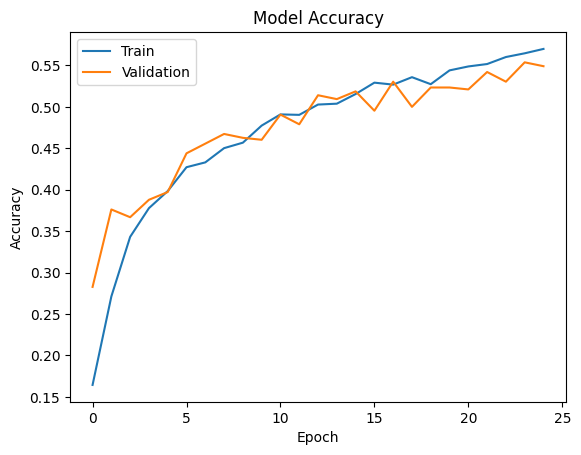

In [201]:
plt.plot(history_vgg16.history["accuracy"])
plt.plot(history_vgg16.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [202]:
model_3_test_accuracy = model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 1.2983 - accuracy: 0.5642 - 2s/epoch - 110ms/step


In [203]:
model_3_train_accuracy = model_3.evaluate(X_train_normalized, y_train_encoded, verbose=2)

121/121 - 13s - loss: 1.0110 - accuracy: 0.6543 - 13s/epoch - 107ms/step


In [204]:
model_3_val_accuracy = model_3.evaluate(X_val_normalized, y_val_encoded, verbose=2)

14/14 - 1s - loss: 1.2984 - accuracy: 0.5491 - 1s/epoch - 106ms/step


In [205]:
y_pred = model_3.predict(X_test_normalized)

15/15 [==============================] - 2s 110ms/step


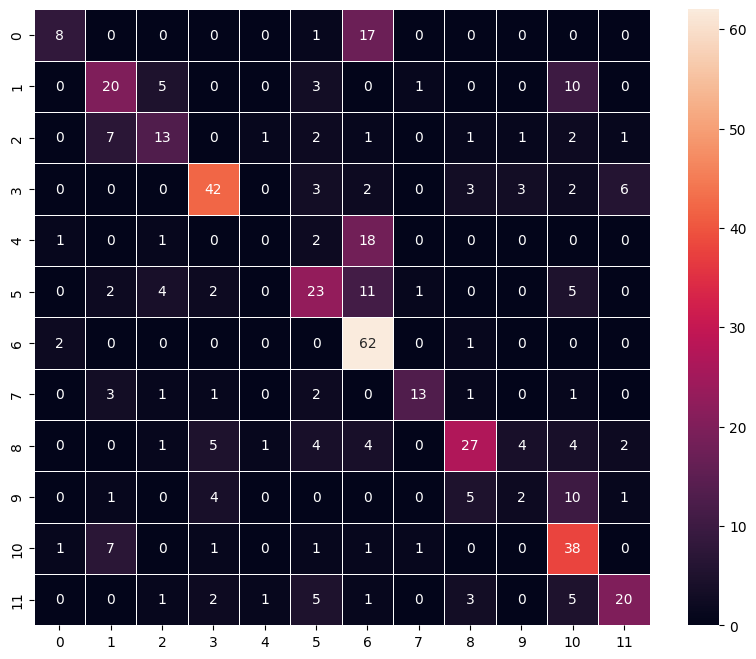

In [206]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.4, fmt="d", square=True, ax=ax)
plt.show()

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

In [207]:
pd.DataFrame(
    {
        "Models": [
            "Base CNN Model",
            "CNN Model with Data Augmentation",
            "Transfer Learning Model",
        ],
        "Train Accuracy": [model1_train_accuracy[1], model_2_train_accuracy[1], model_3_train_accuracy[1]],
        "Validation Accuracy": [model1_val_accuracy[1], model_2_val_accuracy[1], model_3_val_accuracy[1]],
        "Test Accuracy": [model1_test_accuracy[1], model_2_test_accuracy[1], model_3_test_accuracy[1]],
    }
)

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,0.716402,0.637850,0.593684
1,CNN Model with Data Augmentation,0.828178,0.745327,0.734737
2,Transfer Learning Model,0.654276,0.549065,0.564211


### Visualizing the prediction

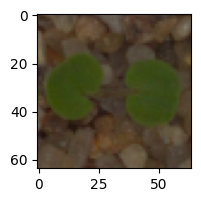

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


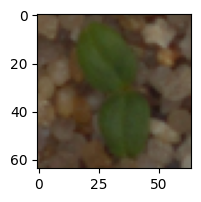

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


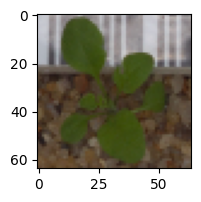

1/1 [==============================] - 0s 15ms/step
Predicted Label:  ['Small-flowered Cranesbill']
True Label:  Shepherds Purse


In [208]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2, 2))
plt.imshow(X_test[2])
plt.show()
print(
    "Predicted Label",
    enc.inverse_transform(
        model_2.predict((X_test_normalized[2].reshape(1, 64, 64, 3)))
    ),
)  # reshaping the input image as we are only trying to predict using a single image
print(
    "True Label", enc.inverse_transform(y_test_encoded)[2]
)  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2, 2))
plt.imshow(X_test[33])
plt.show()
print(
    "Predicted Label",
    enc.inverse_transform(
        model_2.predict((X_test_normalized[33].reshape(1, 64, 64, 3)))
    ),
)  # reshaping the input image as we are only trying to predict using a single image
print(
    "True Label", enc.inverse_transform(y_test_encoded)[33]
)  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2, 2))
plt.imshow(X_test[36])
plt.show()
print(
    "Predicted Label: ",
    enc.inverse_transform(
        model_2.predict((X_test_normalized[36].reshape(1, 64, 64, 3)))
    ),
)  # reshaping the input image as we are only trying to predict using a single image
print("True Label: ", enc.inverse_transform(y_test_encoded)[36])

## Actionable Insights and Business Recommendations

**Potential Avenues for Accuracy Improvement **

CNN Model with Data Augmentation provided the best results in this case
*Expand Dataset: Increase data volume and diversity to improve model generalization.
*Enhance Image Quality: Explore the impact of higher resolution images on model accuracy.
*Optimize Data Augmentation: Experiment with a wider range of data augmentation techniques to generate diverse training samples.
*Fine-tune Hyperparameters: Adjust hyperparameters (epochs, filters) to identify optimal model configurations.

_____